# **MÓDULO 39 - Exercicio - Aplicando SVM**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [5]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [6]:
df = pd.read_csv('CARRO_CLIENTES.csv')

# Visão inicial
df.head()

# Estrutura e tipos
df.info()

# Dados faltantes
missing = df.isnull().sum()
missing = missing[missing > 0]
print(missing if not missing.empty else "Nenhum dado faltante")

# Duplicatas
print("Duplicatas:", df.duplicated().sum())

# Remoção da coluna ID
df = df.drop(columns=['ID'], errors='ignore')





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
Nenhum dado faltante
Duplicatas: 0


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [7]:
le = LabelEncoder()

df['Gender_encoded'] = le.fit_transform(df['Gender'])
df = df.drop(columns=['Gender'])


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

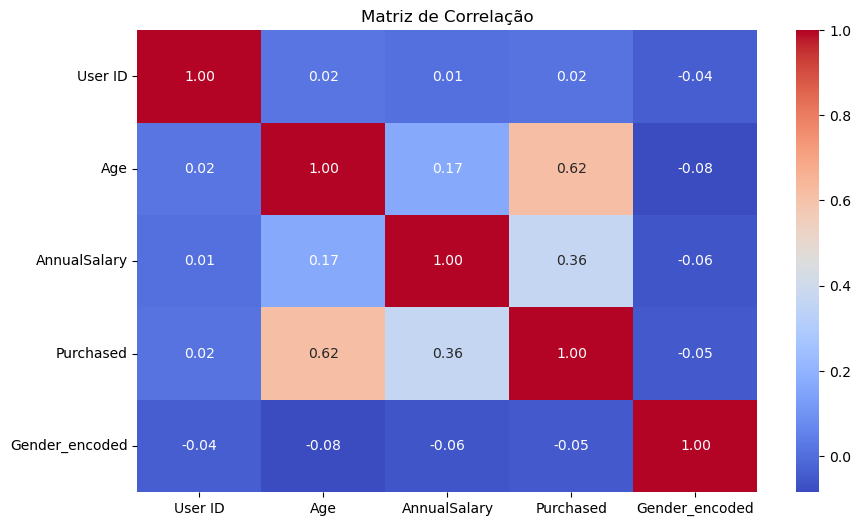

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Matriz de Correlação")
plt.show()


# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
target = 'Purchased'

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [14]:
from sklearn.svm import SVC

svm_linear = SVC(
    kernel='linear',
    probability=True,
    random_state=42
)

svm_linear.fit(X_train_scaled, y_train)


SVC(kernel='linear', probability=True, random_state=42)

# 6. Realize as previsões para a base de teste e traga a avaliação.

In [15]:
y_pred_linear = svm_linear.predict(X_test_scaled)

print("SVM Linear")
print(classification_report(y_test, y_pred_linear))


SVM Linear
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       150
           1       0.84      0.67      0.74       100

    accuracy                           0.82       250
   macro avg       0.82      0.79      0.80       250
weighted avg       0.82      0.82      0.81       250



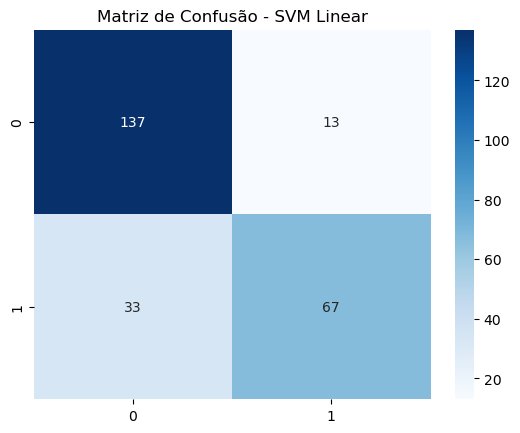

In [16]:
cm_linear = confusion_matrix(y_test, y_pred_linear)

sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - SVM Linear')
plt.show()


# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.

In [ ]:
svm_poly = SVC(
    kernel='poly',
    degree=3,
    probability=True,
    random_state=42
)

svm_poly.fit(X_train_scaled, y_train)


# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?